In [1]:
!pip freeze

absl-py==0.9.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.0.1
asgiref==3.2.7
astor==0.8.1
astropy==4.0.1
astunparse==1.6.3
atari-py==0.2.6
atomicwrites==1.3.0
attrs==19.3.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.1.0
beautifulsoup4==4.6.3
bleach==3.1.4
blis==0.4.1
bokeh==1.4.0
boto3==1.12.31
botocore==1.15.31
Bottleneck==1.3.2
branca==0.4.0
bs4==0.0.1
CacheControl==0.12.6
cachetools==3.1.1
catalogue==1.0.0
certifi==2019.11.28
cffi==1.14.0
chainer==6.5.0
chardet==3.0.4
click==7.1.1
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.4.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.4
cvxpy==1.0.28
cycler==0.10.0
cymem==2.0.3
Cython==0.29.16
daft==0.0.4
dask==2.12.0
dataclasses==0.7
datascience==0.10.6
decorator==4.4.2
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.1.1
distributed==1.25.3
Django==3.0.4
dlib==19.18.0
docopt==0.6.2
docutils==0.15.2
dopamine-rl==1.0.5
earthe

In [2]:
!pip install geopandas
!apt-get install -y libspatialindex-dev
!pip install rtree


# Then import packages
import pandas as pd  # provides interface for interacting with tabular data
import geopandas as gpd  # combines the capabilities of pandas and shapely for geospatial operations
from shapely.geometry import Point, Polygon, MultiPolygon  # for manipulating text data into geospatial shapes
from shapely import wkt  # stands for "well known text," allows for interchange across GIS programs
import rtree  # supports geospatial join

     |████████████████████████████████| 931kB 1.4MB/s 
     |████████████████████████████████| 14.7MB 300kB/s 
     |████████████████████████████████| 10.4MB 43.1MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 2s (227 kB/s)
Selecting previously u

In [3]:
from google.colab import drive
drive.mount('/content/gdrive') # connects Colab to your Google Drive
root_path = 'gdrive/My Drive/gis/' # set root path to folder where you uploaded the data

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Read in PUDs file as a geodataframe and initialize coordinate reference system (CRS)
puds = gpd.read_file(root_path+'input/Planned_Unit_Development_PUDs.shp', crs = {'init' :'epsg:4326'})
aff = pd.read_csv(root_path+'input/Affordable_Housing.csv')
crosswalk = pd.read_csv(root_path+'input/zoning_crosswalk.csv')

In [5]:
puds.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    292 non-null    int64   
 1   PUD_NAME    292 non-null    object  
 2   PUD_WEB_UR  292 non-null    object  
 3   PUD_CHANGE  287 non-null    object  
 4   PUD_ZONING  292 non-null    object  
 5   PUD_STATUS  292 non-null    object  
 6   PUD_CASE_N  292 non-null    object  
 7   SHAPEAREA   292 non-null    int64   
 8   SHAPELEN    292 non-null    int64   
 9   GLOBALID    292 non-null    object  
 10  WARD        277 non-null    object  
 11  geometry    292 non-null    geometry
dtypes: geometry(1), int64(3), object(8)
memory usage: 27.5+ KB


In [6]:
aff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   X                              485 non-null    float64
 1   Y                              485 non-null    float64
 2   OBJECTID                       485 non-null    int64  
 3   MAR_WARD                       485 non-null    object 
 4   ADDRESS                        478 non-null    object 
 5   PROJECT_NAME                   485 non-null    object 
 6   STATUS_PUBLIC                  485 non-null    object 
 7   AGENCY_CALCULATED              485 non-null    object 
 8   TOTAL_AFFORDABLE_UNITS         485 non-null    int64  
 9   LATITUDE                       476 non-null    float64
 10  LONGITUDE                      477 non-null    float64
 11  AFFORDABLE_UNITS_AT_0_30_AMI   485 non-null    int64  
 12  AFFORDABLE_UNITS_AT_31_50_AMI  485 non-null    int

In [7]:
crosswalk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Zone      64 non-null     object
 1   Count     64 non-null     int64 
 2   Zone_Cat  64 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
puds.sample(n = 5, random_state = 123)

,OBJECTID,PUD_NAME,PUD_WEB_UR,PUD_CHANGE,PUD_ZONING,PUD_STATUS,PUD_CASE_N,SHAPEAREA,SHAPELEN,GLOBALID,WARD,geometry
193,97025,Abdo Development LLC,https://app.dcoz.dc.gov/Content/Search/ViewCas...,"Official Digital Zoning Map of July 1, 2010",C-3-C,Final,04-22A,0,0,{BC2989D4-5E7F-4B6B-A09C-BC6CA81370A9},Ward 6,"POLYGON ((-77.00282 38.90033, -77.00335 38.900..."
142,97205,Parkside Residential LLC,https://app.dcoz.dc.gov/Content/Search/ViewCas...,PUD Modification,"C-3-A, CR",Final,05-28N,0,0,{8C8C31BF-D7EA-4A50-A739-23C3C0C59113},Ward 7,"MULTIPOLYGON (((-76.95080 38.89925, -76.95126 ..."
31,97072,4L Associates Joint Venture,https://app.dcoz.dc.gov/Content/Search/ViewCas...,"Official Digital Zoning Map of July 1, 2010",R-5-A,Final,80-17,0,0,{81DF49AD-22AD-4F8C-94F6-3819C9A63D2C},Ward 5,"POLYGON ((-77.00472 38.92462, -77.00473 38.924..."
270,96972,M St Dev Group LLC & Square 772 Dev Group LLC,https://app.dcoz.dc.gov/Content/Search/ViewCas...,"DC Register 11/20/15, Time Extension 11/19/18",C-3-C,Final,14-19A,0,0,{5027ED85-F402-48A7-889C-BE6C6096C014},Ward 6,"POLYGON ((-77.00187 38.90651, -77.00135 38.906..."
41,97082,Stanton-Eastbanc LLC,https://app.dcoz.dc.gov/Content/Search/ViewCas...,Case # 11-24,C-2-B,Final,11-24,0,0,{3B2D4C90-6B95-42F1-9EAB-3E776FD27AE2},Ward 6,"POLYGON ((-76.99602 38.88626, -76.99560 38.886..."


In [10]:
aff.sample(n = 5, random_state = 123)

,X,Y,OBJECTID,MAR_WARD,ADDRESS,PROJECT_NAME,STATUS_PUBLIC,AGENCY_CALCULATED,TOTAL_AFFORDABLE_UNITS,LATITUDE,LONGITUDE,AFFORDABLE_UNITS_AT_0_30_AMI,AFFORDABLE_UNITS_AT_31_50_AMI,AFFORDABLE_UNITS_AT_51_60_AMI,AFFORDABLE_UNITS_AT_61_80_AMI,AFFORDABLE_UNITS_AT_81_AMI,CASE_ID,ADDRESS_ID,XCOORD,YCOORD,FULLADDRESS,GIS_LAST_MOD_DTTM
388,-76.980639,38.904786,1226,Ward 5,"1122 Bladensburg Road Northeast, Washington, D...",1122-1124 Bladensburg Rd NE,Under Construction,DHCD,4,38.904778,-76.980637,0,2,0,2,0,NaN,73518.0,401679.520000,137435.890000,1122 BLADENSBURG ROAD NE,2020-03-30T04:00:32.000Z
415,-77.021921,38.912321,192,Ward 6,"1707 7th Street NW, Washington, District of Co...",Parcel 42,Pipeline,DMPED,56,38.912313,-77.021919,18,18,0,20,0,NaN,NaN,398099.022844,138272.383753,NaN,2020-03-30T04:00:32.000Z
5,-76.981971,38.925958,12,Ward 5,"1515 Rhode Island Avenue Northeast, Washington...",1515 Rhode Island Ave NE,Completed 2015 to Date,DHCD,2,38.925951,-76.981968,0,1,0,1,0,NaN,61927.0,401563.570000,139786.180000,1515 RHODE ISLAND AVENUE NE,2020-03-30T04:00:32.000Z
370,-76.999089,38.894273,1205,Ward 6,"504 C St NE, Washington, District of Columbia ...",504 C St NE,Completed 2015 to Date,DHCD,1,38.894266,-76.999087,0,0,0,1,0,NaN,14477.0,400079.220000,136268.740000,504 C STREET NE,2020-03-30T04:00:32.000Z
401,-77.016124,38.949545,1240,Ward 4,"301 Delafield Place Northwest, Washington, Dis...",301 Delafield Place,Completed 2015 to Date,DHCD,23,38.949519,-77.016119,7,9,0,7,0,NaN,243897.0,398602.550000,142404.430000,301 DELAFIELD PLACE NW,2020-03-30T04:00:32.000Z


In [11]:
crosswalk.sample(n = 5, random_state = 123)

,Zone,Count,Zone_Cat
51,"SP-1, SP-2",1,Other/Mixed Use
31,C-M-1,1,Commercial
63,"C-2-B, FT/C-2-B",1,Commercial
53,"C-3-C, R-5-B, W-1",1,Other/Mixed Use
23,GA/C-2-B,2,Other/Mixed Use


In [12]:
# Create a geometry column in the affordable housing dataframe
aff['geometry'] = aff.apply(lambda row: Point(row.X, row.Y), axis=1)
aff = gpd.GeoDataFrame(aff, crs={'init' :'epsg:4326'})

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [13]:
aff.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   X                              485 non-null    float64 
 1   Y                              485 non-null    float64 
 2   OBJECTID                       485 non-null    int64   
 3   MAR_WARD                       485 non-null    object  
 4   ADDRESS                        478 non-null    object  
 5   PROJECT_NAME                   485 non-null    object  
 6   STATUS_PUBLIC                  485 non-null    object  
 7   AGENCY_CALCULATED              485 non-null    object  
 8   TOTAL_AFFORDABLE_UNITS         485 non-null    int64   
 9   LATITUDE                       476 non-null    float64 
 10  LONGITUDE                      477 non-null    float64 
 11  AFFORDABLE_UNITS_AT_0_30_AMI   485 non-null    int64   
 12  AFFORDABLE_UNITS_AT_31_50_AM

In [17]:
aff.sample(n = 5, random_state = 123)

,X,Y,OBJECTID,MAR_WARD,ADDRESS,PROJECT_NAME,STATUS_PUBLIC,AGENCY_CALCULATED,TOTAL_AFFORDABLE_UNITS,LATITUDE,LONGITUDE,AFFORDABLE_UNITS_AT_0_30_AMI,AFFORDABLE_UNITS_AT_31_50_AMI,AFFORDABLE_UNITS_AT_51_60_AMI,AFFORDABLE_UNITS_AT_61_80_AMI,AFFORDABLE_UNITS_AT_81_AMI,CASE_ID,ADDRESS_ID,XCOORD,YCOORD,FULLADDRESS,GIS_LAST_MOD_DTTM,geometry
388,-76.980639,38.904786,1226,Ward 5,"1122 Bladensburg Road Northeast, Washington, D...",1122-1124 Bladensburg Rd NE,Under Construction,DHCD,4,38.904778,-76.980637,0,2,0,2,0,NaN,73518.0,401679.520000,137435.890000,1122 BLADENSBURG ROAD NE,2020-03-30T04:00:32.000Z,POINT (-76.98064 38.90479)
415,-77.021921,38.912321,192,Ward 6,"1707 7th Street NW, Washington, District of Co...",Parcel 42,Pipeline,DMPED,56,38.912313,-77.021919,18,18,0,20,0,NaN,NaN,398099.022844,138272.383753,NaN,2020-03-30T04:00:32.000Z,POINT (-77.02192 38.91232)
5,-76.981971,38.925958,12,Ward 5,"1515 Rhode Island Avenue Northeast, Washington...",1515 Rhode Island Ave NE,Completed 2015 to Date,DHCD,2,38.925951,-76.981968,0,1,0,1,0,NaN,61927.0,401563.570000,139786.180000,1515 RHODE ISLAND AVENUE NE,2020-03-30T04:00:32.000Z,POINT (-76.98197 38.92596)
370,-76.999089,38.894273,1205,Ward 6,"504 C St NE, Washington, District of Columbia ...",504 C St NE,Completed 2015 to Date,DHCD,1,38.894266,-76.999087,0,0,0,1,0,NaN,14477.0,400079.220000,136268.740000,504 C STREET NE,2020-03-30T04:00:32.000Z,POINT (-76.99909 38.89427)
401,-77.016124,38.949545,1240,Ward 4,"301 Delafield Place Northwest, Washington, Dis...",301 Delafield Place,Completed 2015 to Date,DHCD,23,38.949519,-77.016119,7,9,0,7,0,NaN,243897.0,398602.550000,142404.430000,301 DELAFIELD PLACE NW,2020-03-30T04:00:32.000Z,POINT (-77.01612 38.94954)


In [18]:
# Use geospatial join to identify which PUDs include affordable housing projects
puds_aff = gpd.sjoin(puds, aff, op='intersects', how='left')

/usr/local/lib/python3.6/dist-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(epsg:4326 != +init=epsg:4326 +type=crs)
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [0]:
# Merge dataframe with zoning categories crosswalk
puds_info = puds_aff.merge(crosswalk[['Zone_Cat']], how='left', left_on='PUD_ZONING', right_on=crosswalk['Zone'])


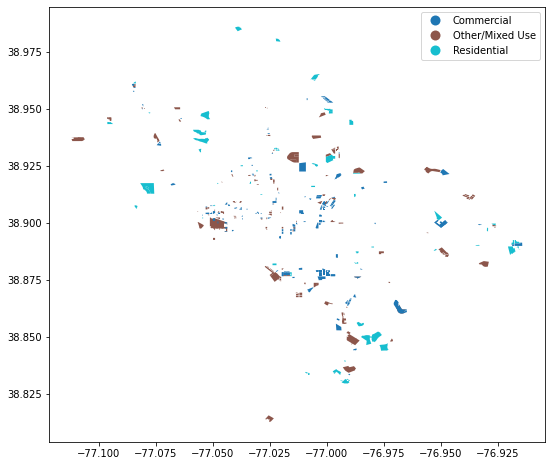

In [20]:

# Create a map of PUDs by Zoning Category
puds_info.plot(column='Zone_Cat', legend=True, figsize=(16,8));

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:509: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


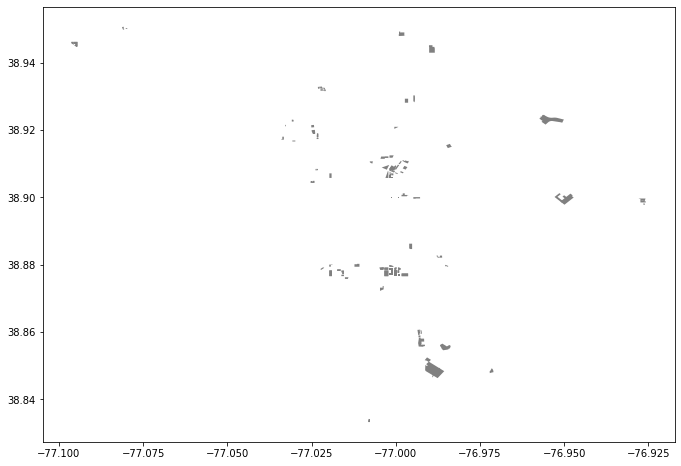

In [21]:
# Create a map of just the PUDs that provide Affordable Housing
puds_info[puds_info['TOTAL_AFFORDABLE_UNITS']>0].plot(column='TOTAL_AFFORDABLE_UNITS', color='grey', figsize=(16,8));


In [0]:
# Export geodataframe as shapefile within Colab environment
puds_info.to_file('puds_info.shp')


# Copy shapefile components from Colab environment to Google Drive using bash script
!cp puds_info.cpg 'gdrive/My Drive/gis/output'
!cp puds_info.dbf 'gdrive/My Drive/gis/output'
!cp puds_info.prj 'gdrive/My Drive/gis/output'
!cp puds_info.shp 'gdrive/My Drive/gis/output'
!cp puds_info.shx 'gdrive/My Drive/gis/output'